<a href="https://colab.research.google.com/github/Ry-an7/A3-Intro-to-vegalite/blob/main/Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<center><h1> <b>Image Dataset Analysis and Project Development with YOLO (Dataset Cleaning)</b> </center> </h1>


## **Object Detection**

Object detection is a task that involves identifying the location and class of objects in an image or video stream.

The output of an object detector is a set of bounding boxes that enclose the objects in the image, along with class labels and confidence scores for each box.



&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://user-images.githubusercontent.com/26833433/243418624-5785cb93-74c9-4541-9179-d5c6782d491a.png" width="600">

**Labelling format**

In object detection tasks, various labeling formats are used to annotate images with information about the objects present. These formats typically include details about the object's class and location within the image. Here are some of the most common labeling formats:

1. COCO
2. YOLO
3. CSV  
5. XML
6. PASCAL VOC

We will be discussing only YOLO format, as you will be using YOLO framework for your project:

- One .txt file with labels file per image
- One row per object
- Each row contains:

      class_id bbox_x_center bbox_y_center bbox_width bbox_height
- Box coordinates must be normalized between 0 and 1


An example:




&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://user-images.githubusercontent.com/26833433/91506361-c7965000-e886-11ea-8291-c72b98c25eec.jpg" width="600">

Corresponding label text file should look like:


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://user-images.githubusercontent.com/26833433/112467037-d2568c00-8d66-11eb-8796-55402ac0d62f.png" width="600">

**Labelling format for YOLO**


- One .txt file with labels file per image
- One row per object
- Each row contains:
  - class index: An integer representing the class of the object (e.g., 0 for person, 1 for car, etc.).
  - bounding coordinates: The bounding coordinates around the mask area, normalized to be between 0 and 1.


      <class-index> <x1> <y1> <x2> <y2> ... <xn> <yn>


Here is an example of the YOLO dataset format for a single image with two objects made up of a 3-point segment and a 5-point segment.


      0 0.681 0.485 0.670 0.487 0.676 0.487
      1 0.504 0.000 0.501 0.004 0.498 0.004 0.493 0.010 0.492 0.0104


## FOLDERS HEIRARCHY




 We need to convert the dataset into a specific heirarchy of folders for all the tasks except for task of classification.


The directories should be in the following format:

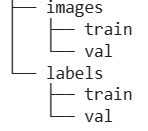


## Dataset Visualization


To draw bounding boxes on images we need to understand the labelling format used by this dataset. The labels for this dataset are stored in YOLO format. i.e.

        class_id bbox_x_center bbox_y_center bbox_width bbox_height




The class_id is the numerical number assigned to different class labels as shown below:

In [ ]:
class_labels = {
    0: "with helmet",
    1: "without helmet",
    2: "rider",
    3: "number plate",
}

The rest of the four values i.e.

    0.479492 0.688771 0.955609 0.5955

indidicate the location of the bounding box.

These values are normalized, which should be converted to a format that can be used as coordinate values of rectangle function (of cv2).

First import the required libraries:

In [ ]:
import cv2
import matplotlib.pyplot as plt
import random as random
import os

Set all the paths of the dataset:

Data Cleaning For Train Dataset

In [ ]:
# Michael dataset path
dataset_path = "/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset"

In [ ]:
# Ryan's dataset path
dataset_path = "/content/drive/MyDrive/ComputerVisionProject/ComputerVisionDataset"

In [ ]:
# Get the list of all images paths in the dataset
image_paths = [os.path.join(dataset_path, "images/train", image_name) for image_name in os.listdir(os.path.join(dataset_path, "images/train"))]

# Get the list of all labels paths in the dataset
label_paths = [os.path.join(dataset_path, "labels/train", label_name) for label_name in os.listdir(os.path.join(dataset_path, "labels/train"))]

print (image_paths)

['/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/train/new13.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/train/new139.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/train/new103.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/train/new112.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/train/new136.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/train/new128.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/train/new124.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/train/new120.jpg', '/content/drive/

The funtion "draw_yolo_box", takes input an image path and its corresponding label path. Then, draws the bounding boxes and write the object's label in each box. Finally it displays the images

In [ ]:
def draw_yolo_bbox(image_path, label_path):
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape

    # Read label file
    with open(label_path, 'r') as file:
        bboxes = file.readlines()

    # Draw each bbox
    for bbox in bboxes:
        class_id, x_center, y_center, bbox_width, bbox_height = [float(x) for x in bbox.split()]

        # Convert YOLO bbox format to rectangle coordinates
        x1 = int((x_center - bbox_width / 2) * width)
        y1 = int((y_center - bbox_height / 2) * height)
        x2 = int((x_center + bbox_width / 2) * width)
        y2 = int((y_center + bbox_height / 2) * height)

        # Draw rectangle
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        # Put label (class_id) near the bbox
        label = class_labels[int(class_id)]
        cv2.putText(image, label, (x1, y1+20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)
    # Display image
    plt.imshow(image)
    plt.axis('off')
    plt.show()

The function "print_random_images" takes in input the list of images' paths, a number defining how much images we want to print. So it randomly selects the images to display and calls "draw_yolo_bbox".

In [ ]:
def print_random_images(photos: list, n: int = 5):
  for im in range(n):
        random_photo_path = random.choice(photos)
        name=random_photo_path.split('/')[-1].split('.')[0]
        label_path=dataset_path+"/labels/train/"+name+".txt"
        draw_yolo_bbox(random_photo_path ,label_path )



Now, finally calling the function to display 6 images randomly.

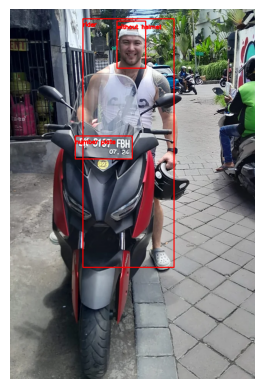

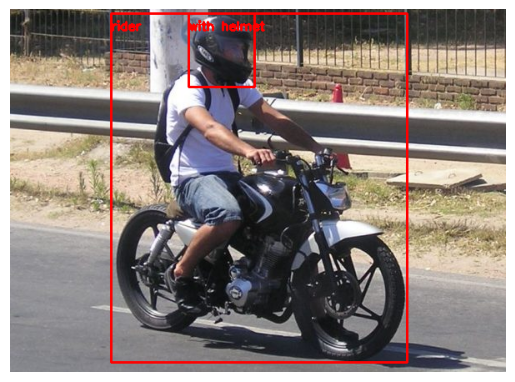

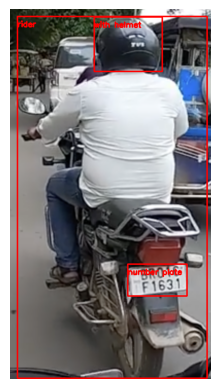

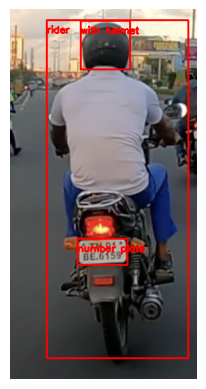

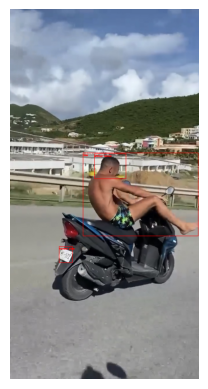

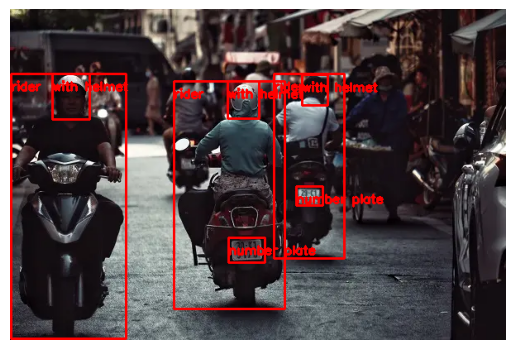

In [ ]:
print_random_images(image_paths,n=6 )

## Dataset Cleaning

Interestingly, we found out that this dataset is not clean. i.e. labels of some of the images are missing and there are extra labels. So, we need to find out the missing labels files and remove that from the labels folder. Also, we need to find out missing images, which we also need to remove from the images folder.


In [ ]:
#we already have a list of images' paths and labels' path, stored in variables : image_paths and label_paths
print(image_paths)
print(label_paths)

['/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/train/new13.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/train/new139.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/train/new103.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/train/new112.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/train/new136.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/train/new128.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/train/new124.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/train/new120.jpg', '/content/drive/

Now, we make a list of only the names of images' files and labels' files.

e.g.  only  000000000531 without the extension

In [ ]:
# Get the list of filenames without extensions
image_files = {file.split("/")[-1].split(".")[0] for file in image_paths}
label_files = {file.split("/")[-1].split(".")[0] for file in label_paths}

print(image_files)

{'new93', 'new169', 'new164', 'new160', 'new69', 'new90', 'new20', 'new8', 'new114', 'new147', 'new149', 'new63', 'new146', 'new130', 'new72', 'new76', 'new103', 'new142', 'new96', 'new66', 'new109', 'new11', 'new71', 'new163', 'new129', 'new68', 'new10', 'new162', 'new55', 'new180', 'new154', 'new173', 'new124', 'new5', 'new35', 'new112', 'new136', 'new121', 'new15', 'new37', 'new13', 'new75', 'new45', 'new143', 'new110', 'new16', 'new176', 'new119', 'new183', 'new132', 'new64', 'new82', 'new51', 'new141', 'new18', 'new 172', 'new139', 'new166', 'new21', 'new42', 'new155', 'new133', 'new171', 'new140', 'new1', 'new87', 'new179', 'new91', 'new100', 'new148', 'new175', 'new165', 'new106', 'new95', 'new128', 'new134', 'new46', 'new81', 'new101', 'new152', 'new30', 'new170', 'new58', 'new151', 'new84', 'new117', 'new102', 'new79', 'new135', 'new85', 'new145', 'new54', 'new61', 'new118', 'new31', 'new123', 'new181', 'new156', 'new48', 'new60', 'new108', 'new40', 'new150', 'new187', 'new182

In [ ]:
# Find extra files in each folder
extra_images = image_files - label_files
extra_labels = label_files - image_files

# Output the results
print(f"Extra images (without corresponding labels): {extra_images}")
print(f"Extra labels (without corresponding images): {extra_labels}")

Extra images (without corresponding labels): set()
Extra labels (without corresponding images): set()


# Run only if extra files found

In [ ]:
for file in extra_images:
     os.remove(os.path.join(dataset_path,"images/train/", file + '.jpg')) # or '.png' depending on your image format

for file in extra_labels:
     os.remove(os.path.join(dataset_path,"labels/train/", file + '.txt'))


Now removing them from the dataset:

In [ ]:
os.path.join(dataset_path,"images/train/", file + '.jpg')

NameError: name 'file' is not defined

Check again if it worked:

In [ ]:
# Get the list of all images paths in the dataset
image_paths = [os.path.join(dataset_path, "images/test", image_name) for image_name in os.listdir(os.path.join(dataset_path, "images/test"))]

# Get the list of all labels paths in the dataset
label_paths = [os.path.join(dataset_path, "labels/test", label_name) for label_name in os.listdir(os.path.join(dataset_path, "labels/test"))]

# Get the list of filenames without extensions
image_files = {file.split("/")[-1].split(".")[0] for file in image_paths}
label_files = {file.split("/")[-1].split(".")[0] for file in label_paths}
# Find extra files in each folder
extra_images = image_files - label_files
extra_labels = label_files - image_files

# Output the results
print(f"Extra images (without corresponding labels): {extra_images}")
print(f"Extra labels (without corresponding images): {extra_labels}")

Extra images (without corresponding labels): set()
Extra labels (without corresponding images): set()


# **Data cleaning for Val dataset**

Change path to val on both images and labels.

In [ ]:
# Get the list of all images paths in the dataset
image_paths_val = [os.path.join(dataset_path, "images/val", image_name) for image_name in os.listdir(os.path.join(dataset_path, "images/val"))]

# Get the list of all labels paths in the dataset
label_paths_val = [os.path.join(dataset_path, "labels/val", label_name) for label_name in os.listdir(os.path.join(dataset_path, "labels/val"))]

print (image_paths_val)

['/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/val/new89.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/val/new98.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/val/new86.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/val/new9.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/val/new113.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/val/new56.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/val/new80.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/val/new0.jpg', '/content/drive/MyDrive/SFU/300 Level Co

Draw yolo box on the images

In [ ]:
def print_random_images(photos: list, n: int = 5):
  for im in range(n):
        random_photo_path = random.choice(photos)
        name=random_photo_path.split('/')[-1].split('.')[0]
        label_path=dataset_path+"/labels/val/"+name+".txt"
        draw_yolo_bbox(random_photo_path ,label_path )

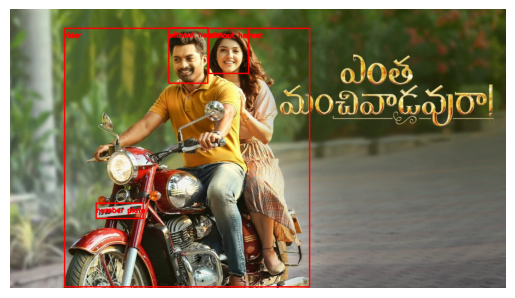

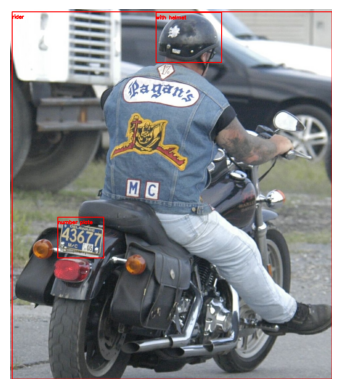

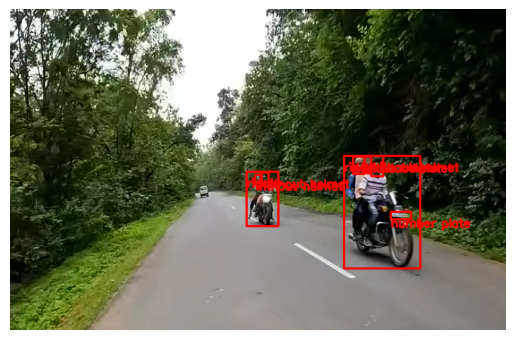

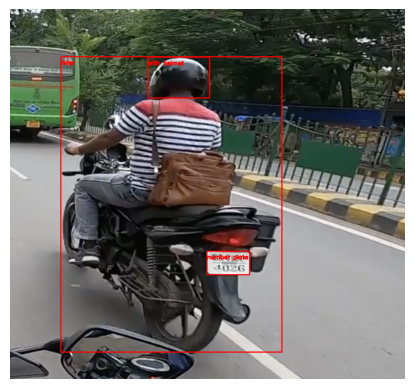

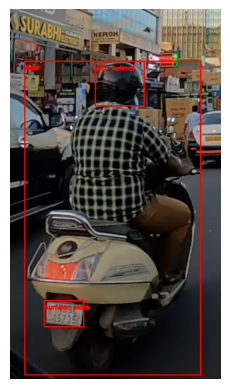

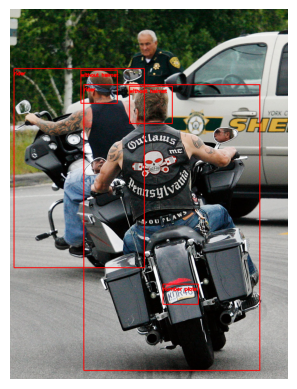

In [ ]:
print_random_images(image_paths_val,n=6 )

In [ ]:
#we already have a list of images' paths and labels' path, stored in variables : image_paths and label_paths
print(image_paths_val)
print(label_paths_val)

['/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/val/new89.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/val/new98.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/val/new86.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/val/new9.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/val/new113.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/val/new56.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/val/new80.jpg', '/content/drive/MyDrive/SFU/300 Level Courses/IAT360/ComputerVisionProject/ComputerVisionDataset/images/val/new0.jpg', '/content/drive/MyDrive/SFU/300 Level Co

In [ ]:
# Get the list of filenames without extensions
image_files_val = {file.split("/")[-1].split(".")[0] for file in image_paths_val}
label_files_val = {file.split("/")[-1].split(".")[0] for file in label_paths_val}

print(image_files_val)

{'new198', 'new9', 'new200', 'new86', 'new192', 'new203', 'new199', 'new28', 'new80', 'new185', 'new195', 'new193', 'new127', 'new113', 'new115', 'new89', 'new49', 'new205', 'new4', 'new186', 'new47', 'new190', 'new98', 'new26', 'new94', 'new189', 'new191', 'new201', 'new73', 'new74', 'new188', 'new41', 'new196', 'new202', 'new204', 'new0', 'new197', 'new56', 'new194', 'new137'}


In [ ]:
# Find extra files in each folder
extra_images_val = image_files_val - label_files_val
extra_labels_val = label_files_val - image_files_val

# Output the results
print(f"Extra images (without corresponding labels): {extra_images_val}")
print(f"Extra labels (without corresponding images): {extra_labels_val}")

Extra images (without corresponding labels): set()
Extra labels (without corresponding images): set()


Check if val data is clean

In [ ]:
# Get the list of filenames without extensions
image_files_val = {file.split("/")[-1].split(".")[0] for file in image_paths}
label_files_val = {file.split("/")[-1].split(".")[0] for file in label_paths}
# Find extra files in each folder
extra_images_val = image_files_val - label_files_val
extra_labels_val = label_files_val - image_files_val

# Output the results
print(f"Extra images (without corresponding labels): {extra_images_val}")
print(f"Extra labels (without corresponding images): {extra_labels_val}")

Extra images (without corresponding labels): set()
Extra labels (without corresponding images): set()
